In [27]:
library(tidyverse)
library(tidymodels)
library(repr)
library(ggplot2)
options(repr.matrix.max.rows = 6)
install.packages('kknn')
library("kknn")
library(GGally)

url <- "https://raw.githubusercontent.com/Xela-debug/datasets/main/Housing.csv"
housing_df <- read_csv(url)

set.seed(2023)
housing_split <- initial_split(housing_df, prop = 0.75, strata = price)
housing_test <- testing(housing_split)
housing_train <- training(housing_split)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Rows: 545 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): mainroad, guestroom, basement, hotwaterheating, airconditioning, pr...
dbl (6): price, area, bedrooms, bathrooms, stories, parking

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



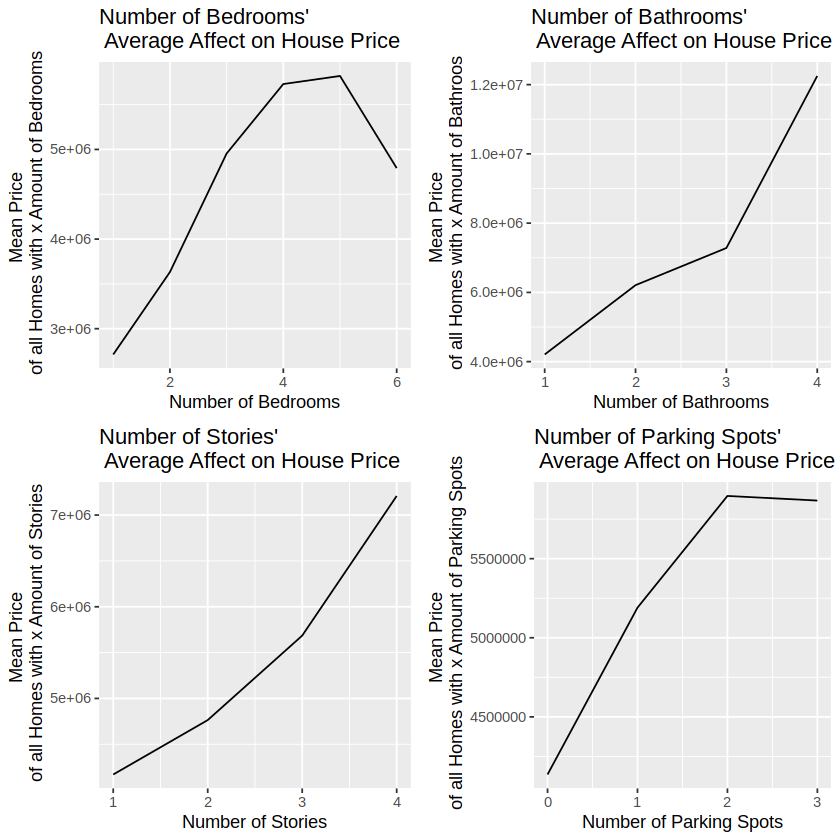

In [26]:
#examine the average affect of other quantitative datas on house price, including numbers of bedrooms, bathrooms, stories, parking spots.

mean_housing_df <- housing_df |>
    group_by(bedrooms) |>
    mutate(mean_price_per_bedroom = mean(price))
bedrooms_plot <- mean_housing_df |>
    ggplot(aes(x = bedrooms, y = mean_price_per_bedroom)) +
        geom_line() +
        labs(title = "Number of Bedrooms'\n Average Affect on House Price", x = "Number of Bedrooms", y = "Mean Price \n of all Homes with x Amount of Bedrooms")

mean_housing_df <- housing_df |>
    group_by(bathrooms) |>
    mutate(mean_price_per_bathroom = mean(price))
bathrooms_plot <- mean_housing_df |>
    ggplot(aes(x = bathrooms, y = mean_price_per_bathroom)) +
        geom_line() +
        labs(title = "Number of Bathrooms'\n Average Affect on House Price", x = "Number of Bathrooms", y = "Mean Price \n of all Homes with x Amount of Bathroos")

mean_housing_df <- housing_df |>
    group_by(stories) |>
    mutate(mean_price_per_stories = mean(price))
stories_plot <- mean_housing_df |>
    ggplot(aes(x = stories, y = mean_price_per_stories)) +
        geom_line() +
        labs(title = "Number of Stories'\n Average Affect on House Price", x = "Number of Stories", y = "Mean Price \n of all Homes with x Amount of Stories")

mean_housing_df <- housing_df |>
    group_by(parking) |>
    mutate(mean_price_per_parking = mean(price))
parking_plot <- mean_housing_df |>
    ggplot(aes(x = parking, y = mean_price_per_parking)) +
        geom_line() +
        labs(title = "Number of Parking Spots'\n Average Affect on House Price", x = "Number of Parking Spots", y = "Mean Price \n of all Homes with x Amount of Parking Spots")

#combining the graphs for clearer visualization
install.packages("gridExtra")
library(gridExtra)
grid.arrange(bedrooms_plot, bathrooms_plot, stories_plot, parking_plot, nrow = 2)

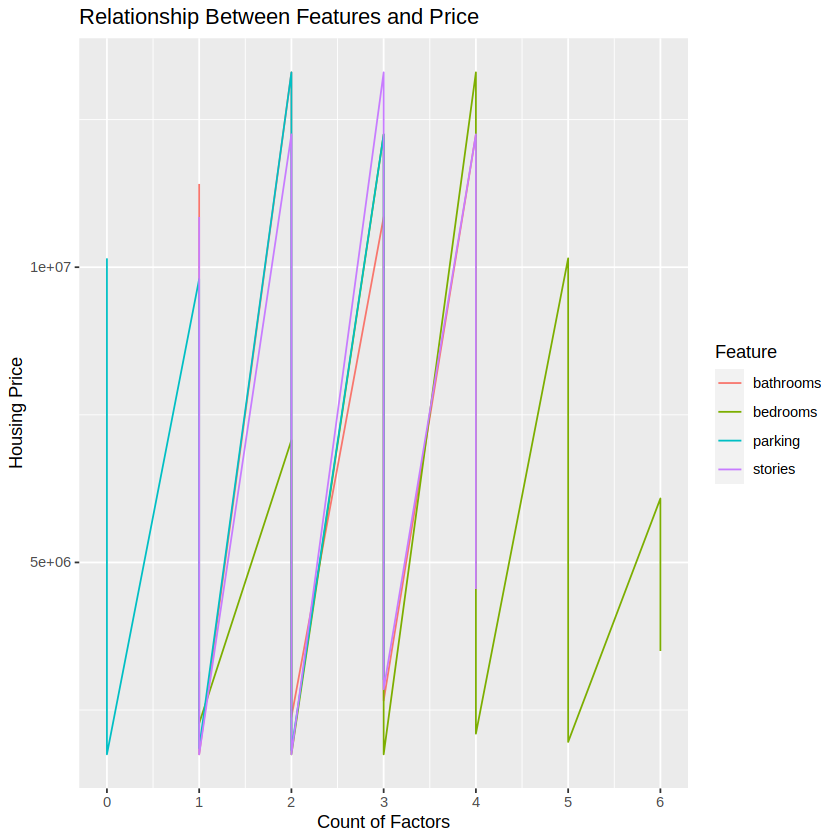

In [53]:
#a failed attempt to combine all variables in one graph ;-;
#tried to see which one has the most influence on housing price
housing_long <- pivot_longer(housing_df, 
                cols = c(bedrooms, bathrooms, stories, parking), 
                names_to = "Feature", 
                values_to = "Count")

other_variables_plot <- ggplot(housing_long, aes(x = Count, y = price, color = Feature)) +
      geom_line() +
      labs(title = "Relationship Between Features and Price",
           x = "Count of Factors",
           y = "Housing Price") +
      scale_x_continuous(breaks = seq(0, 6, by = 1))
other_variables_plot

**Observation**
As expected, all graphs indicates that housing price increases as the quantitative variable (numbers of bedrooms, bathrooms, stories, parking spots)increase. However, each trends contains interesting variations that are worth looking into:
- **Bedrooms:** highest at 5, price decreases after 5 bedrooms
- **Bathrooms:** price increases significantly for bathrooms more than 3 
- **Stories:** increase of prices rises steadily
- **Parking:** highest at 2 parking spots